In [2]:
from skimage import io                    # utilities to read and write images in various formats
import numpy as np                        # array manipulation package
import matplotlib.pylab as plt            # plotting package
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10) # set default figure size
plt.rcParams['image.cmap'] = 'gray'       # set default colormap to gray

# Digital Image Processing - Programming Assignment \#1

The following progamming assignment involves basic histogram operation and spatial image (sharpening) filtering tasks. The deadline for returning your work is **31 October 2018 at 23:59. Please, follow carefully the submission instructions given in the end of this notebook.** You are encouraged to seek information in other places than the course book and lecture material but remember list all your sources under references.

If you experience problems that you cannot solve using the course material, including the provided pre-tutorials, or related Python documentation, or have any questions regarding to the programming assignments in general, please **do not hesitate to contact the course assistant** by e-mail at address `Soumya Sara John <soumyasara100@gmail.com>
` or by visiting the office. You can also use piazza,  which is probably the fastest way to get help.

**At first, fill in your personal details below.**

# Personal details:

* **Name(s) and student ID(s):** Samvram Sahu - SC15B132`
* **Contact information:** samvram.iist@gmail.com

# 1. Histogram operations

In the following, you will have to analyze two images, `cameraman.tif` and `pout.tif`, and their histograms, and to compare the results of two histogram operations, namely histogram equalization and stretching.

Now, perform the following operations in the reserved code cells and answer to the questions written in bold into the reserved spaces.

**1.1. Display the images `cameraman.tif` and `pout.tif` and their histograms in the same figure.**

Hint: You can plot the histogram of an image with matplotlib's __[`hist()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html)__ function but please note that you have to ravel the pixels of the 2D image into 1D array first.

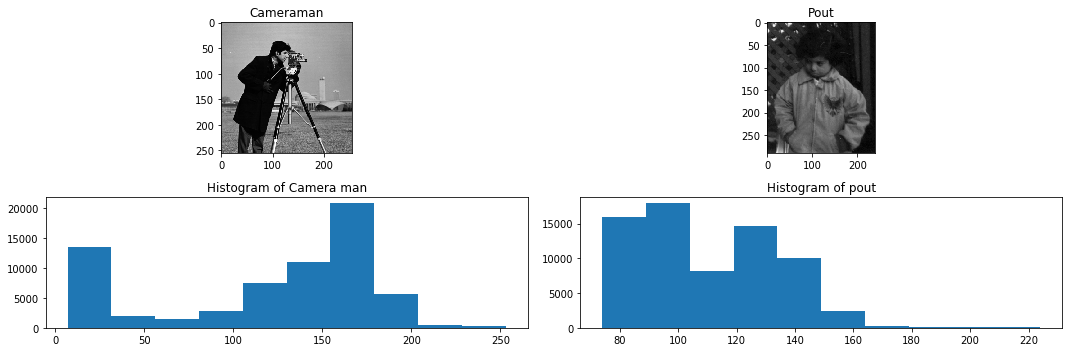

In [3]:
# read the test images
cm = io.imread('cameraman.tif')
pout = io.imread('pout.tif')

# display the images and their histograms in the same figure
fig,ax = plt.subplots(2,2, figsize=(15,5))

ax[0,0].imshow(cm, cmap=plt.get_cmap('gray'))
ax[0,0].set_title('Cameraman')

ax[1,0].hist(np.ravel(cm))
ax[1,0].set_title('Histogram of Camera man')

ax[0,1].imshow(pout, cmap=plt.get_cmap('gray'))
ax[0,1].set_title('Pout')

ax[1,1].hist(np.ravel(pout))
ax[1,1].set_title('Histogram of pout')

fig.tight_layout()

**What can you say about the contrast of the images based on their histograms?**

`pout` seems to have a low contrast as we can infer from the histogram that most of the pixels are of low intensity in nature and there are very less bright pixel values present. However `cameraman` on the other hand seems to have a good contrast value as the pixels are distributed throughout.

### Histogram equalization

**1.2. Perform histogram equalization with the function __[`exposure.equalize_hist()`](http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist)__ and display the resulting images and their histograms in the same figure.**

Hint: Please note that `exposure.equalize_hist()` function returns `float64` image. Therefore, you need to __[convert the image back to `uint8`](http://scikit-image.org/docs/dev/user_guide/data_types.html)__ after histogram equalization.

c:\program files\python35\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


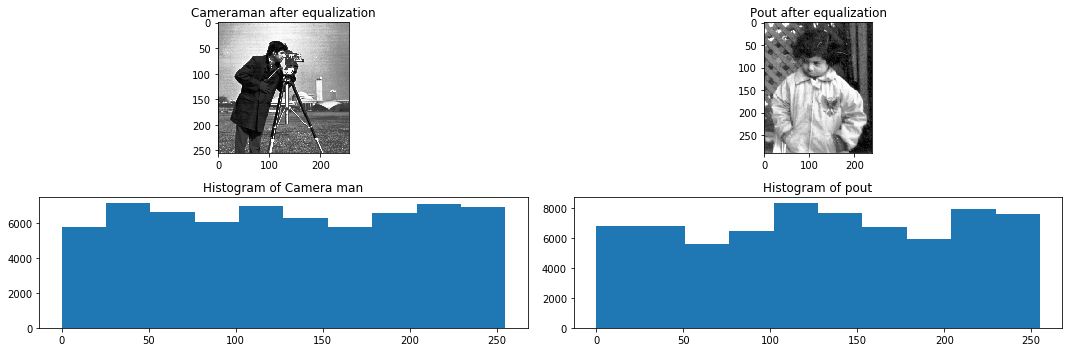

In [4]:
from skimage import exposure
from skimage import img_as_ubyte

# perform histogram equalization and convert data type from 'float64' back to 'uint8' after histogram equalization
cm_eq = img_as_ubyte(exposure.equalize_hist(cm))
pout_eq = img_as_ubyte(exposure.equalize_hist(pout))

# display resulting images and their histograms in the same figure
fig,ax = plt.subplots(2,2, figsize=(15,5))

ax[0,0].imshow(cm_eq, cmap=plt.get_cmap('gray'))
ax[0,0].set_title('Cameraman after equalization')

ax[1,0].hist(np.ravel(cm_eq))
ax[1,0].set_title('Histogram of Camera man')

ax[0,1].imshow(pout_eq, cmap=plt.get_cmap('gray'))
ax[0,1].set_title('Pout after equalization')

ax[1,1].hist(np.ravel(pout_eq))
ax[1,1].set_title('Histogram of pout')

fig.tight_layout()

**Did histogram equalization help in increasing image contrast? Why or why not?**

Yes, histogram equalization helped in increasing image contrast. This was because of the fact that the pixels are now uniformly disttributed in terms of intensity and hence the dark image `pout` is now having a good contrast value, and the image is much bright when compared to its unequalized version.

### Contrast stretching

Another way of improving the contrast in an image is to simply stretch the original pixel values over an extended dynamic range using a linear scaling function. For instance, in case of an `uint8` image, the desired value range of a contrast-stretched image could be the full range from 0 to 255. 

Intuitively, one could perform contrast-stretching by selecting the minimum and maximum values of the original image and map these values to 0 and 255, respectively, and linearly scale all other pixel values in between accordingly. However, even a single outlier pixel value (high or low) can affect the input scaling range too much when outcome of the histogram stretching is not particularly good.

A more robust approach is to map the intensity values so that e.g. 1st and 99th percentiles of the histogram are saturated at the minimum and maximum values of the desired intensity range. In other words, 1% of the pixels of both low and high intensities will be mapped to 0 and 255 in the contrast-stretched image while rest are scaled linearly in between.

**1.3. Now, perform contrast stretching on the original images with the help of functions __[`np.percentile()`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html)__ and __[`exposure.rescale_intensity()`](http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.rescale_intensity)__ so that the full range from 0 and 255 is utilized based on the 1st and 99th percentiles of their histograms. Then, display the resulting images and their histograms in the same figure.**

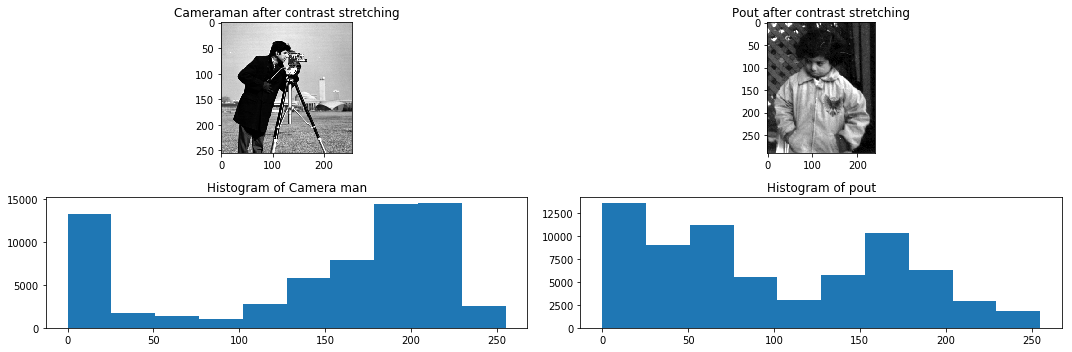

In [5]:
# find the 1st and 99th percentiles of each image
cam_1, cam_99 = (np.percentile(cm, 1), np.percentile(cm, 99))
pout_1, pout_99 = (np.percentile(pout,1), np.percentile(pout, 99))

# rescale the intensities of both images to full 'uint8' range [0, 255] based on their 1st and 99th percentiles
cm_cs = exposure.rescale_intensity(cm, in_range=(cam_1, cam_99), out_range='dtype')
pout_cs = exposure.rescale_intensity(pout, in_range=(pout_1, pout_99), out_range='dtype')

# display resulting images and their histograms
fig,ax = plt.subplots(2,2, figsize=(15,5))

ax[0,0].imshow(cm_cs, cmap=plt.get_cmap('gray'))
ax[0,0].set_title('Cameraman after contrast stretching')

ax[1,0].hist(np.ravel(cm_cs))
ax[1,0].set_title('Histogram of Camera man')

ax[0,1].imshow(pout_cs, cmap=plt.get_cmap('gray'))
ax[0,1].set_title('Pout after contrast stretching')

ax[1,1].hist(np.ravel(pout_cs))
ax[1,1].set_title('Histogram of pout')

fig.tight_layout()

### Comparison

**1.4. Finally, display the original `cameraman.tif` image, and its histogram-equalized and contrast-stretched versions and the corresponding histograms into one figure (in total six images in one figure). Do the same for `pout.tif` as well.**

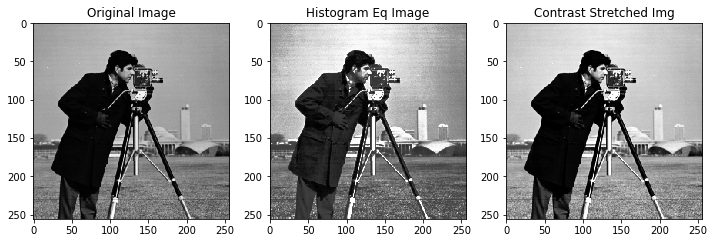

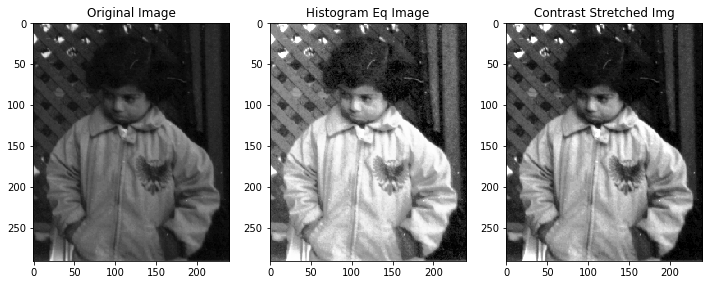

In [7]:
# 6 subplots for 'cameraman.tif'
fig, ax = plt.subplots(1,3, figsize=(10,7))

ax[0].imshow(cm, cmap=plt.get_cmap('gray'))
ax[0].set_title('Original Image')

ax[1].imshow(cm_eq, cmap=plt.get_cmap('gray'))
ax[1].set_title('Histogram Eq Image')

ax[2].imshow(cm_cs, cmap=plt.get_cmap('gray'))
ax[2].set_title('Contrast Stretched Img')

fig.tight_layout()

# 6 subplots for 'pout.tif'
fig, ax = plt.subplots(1,3, figsize=(10,7))

ax[0].imshow(pout, cmap=plt.get_cmap('gray'))
ax[0].set_title('Original Image')

ax[1].imshow(pout_eq, cmap=plt.get_cmap('gray'))
ax[1].set_title('Histogram Eq Image')

ax[2].imshow(pout_cs, cmap=plt.get_cmap('gray'))
ax[2].set_title('Contrast Stretched Img')

fig.tight_layout()

**Which method gives better result for each of the two images in** ***your*** **opinion? Why??**

For `cameraman`, the *contrast stretched* image provides better results, where as for `pout`, the *histogram equalized* image provides a better result. This is mainly because, in `cameraman` the mean intensity or average brightness is almost optimal, only the stretching provides a better result as top 1 percentile of intensity valyues are very less. `pout` on the other hand has a lower average intensity and also has low contrast which is enhanced much better when histogram equalization is used.

# 2. Image sharpening

First, read the part concerning sharpening spatial transforms in the lecture notes or in the course book.

In this exercise, your task is to perform a sharpening transform to the image `moonunsharp.tif` in spatial domain enhancing the details, like edges, in the original grayscale image. The use of built-in functions that perform image sharpening from scratch, like `scipy.misc.imfilter()`, is forbidden but functions like __[`scipy.signal.convolve2d()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)__ can be used for the task. You can select some method presented in the lecture notes or the course book, e.g. use Laplacian operator and convolution, for sharpening the test image. 

Please note that it does not matter what method you use or how “good” the sharpening looks as long as the sharpening can be observed in the end result. An example result achieved with __[`scipy.misc.imfilter()`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.misc.imfilter.html)__ is shown below:

c:\program files\python35\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imfilter` is deprecated!
`imfilter` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow filtering functionality directly.
  import sys


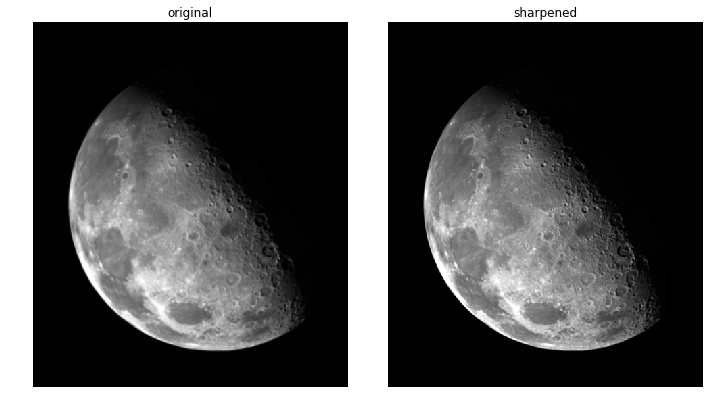

In [8]:
# image sharpening example using 'scipy.misc.imfilter()' function

from scipy.misc import imfilter

moon = io.imread('moonunsharp.tif')

moon_sharp_example = imfilter(moon, 'sharpen')

fig, ax = plt.subplots(1, 2, figsize=(10,7))
ax[0].imshow(moon, cmap=plt.get_cmap('gray'))
ax[0].set_title('original')
ax[0].axis('off')
ax[1].imshow(moon_sharp_example, cmap=plt.get_cmap('gray'))
ax[1].set_title('sharpened')
ax[1].axis('off')
fig.tight_layout()

**2.1. Now, implement your own image sharpening transform and apply it on the test image.**

Hint: Like in the previous task, please note the __[image data type (`dtype`) and corresponding value range](http://scikit-image.org/docs/dev/user_guide/data_types.html)__ after filtering/sharpening as overflow might occur (see pre-tutorials)!

In [13]:
from scipy.signal import convolve2d

# perform image sharpening using e.g. a Laplacian mask and convolution
lap_p = np.array([[0,1,0],
                  [1,-4,1],
                  [0,1,0]])
lap_n = -lap_p

moon_lap_p = convolve2d(moon, lap_p)[1:-1,1:-1]
moon_lap_n = convolve2d(moon, lap_n)[1:-1,1:-1]

moon_sharp = moon+2*moon_lap_p+2*moon_lap_n

**2.2. Display the original and sharpened moon images in the same figure.**

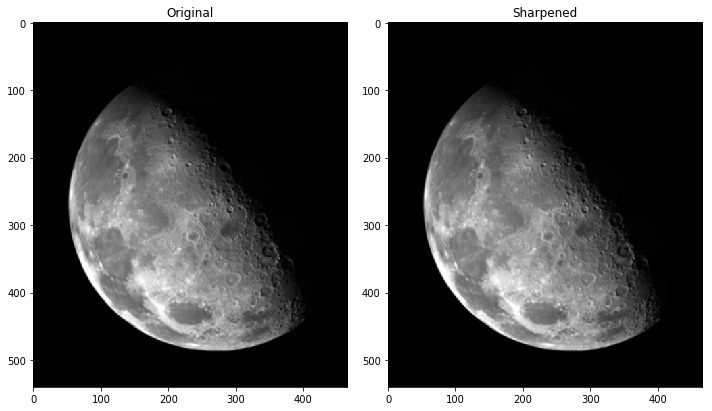

In [14]:
# plot original and sharpened moon images in the same figure
fig, ax = plt.subplots(1,2, figsize=(10,7))

ax[0].imshow(moon, cmap=plt.get_cmap('gray'))
ax[0].set_title('Original')

# ax[2].imshow(moon_sharp_example, cmap=plt.get_cmap('gray'))
# ax[2].set_title('Example')

ax[1].imshow(moon_sharp, cmap=plt.get_cmap('gray'))
ax[1].set_title('Sharpened')

fig.tight_layout()

# Aftermath
Finally, fill your answers to the following questions:

**How much time did you need to complete this exercise?**

30 minutes

**Did you experience any problems with the exercise? Was there enough help available? Should this notebook be more (or less) detailed?**

Very well framed exercise, thanks for being an awesome TA

# References
Numpy, SciPy, Scikit-Image referrence pages

# Submission

1. Click on the menu `Kernel -> Restart & Clear Output` to clear all outputs and variables, etc.
2. Compress the resulting Jupyter notebook (`DIP_PA1.ipynb` file) into **`DIP_PA1_[student number(s)].zip`** (e.g. `DIP_PA1_1234567.zip` if solo work or `DIP_PA1_studentID.zip` if pair work).